In [1]:
from probability import *

In [2]:
%reload_ext autoreload

%autoreload 2


In [3]:
# init

net = CNN()
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)

test_data = datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor()
)

mnist_train = torch.utils.data.DataLoader(train_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1)

mnist_test = torch.utils.data.DataLoader(test_data,
                                         batch_size=100,
                                         shuffle=True,
                                         num_workers=1)

total_step = len(mnist_train)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)
    

In [4]:
net

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)

In [31]:
from torchsummary import summary
summary(net, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             416
              ReLU-2           [-1, 16, 28, 28]               0
         MaxPool2d-3           [-1, 16, 14, 14]               0
            Conv2d-4           [-1, 32, 14, 14]          12,832
              ReLU-5           [-1, 32, 14, 14]               0
         MaxPool2d-6             [-1, 32, 7, 7]               0
            Linear-7                   [-1, 10]          15,690
Total params: 28,938
Trainable params: 28,938
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.32
Params size (MB): 0.11
Estimated Total Size (MB): 0.44
----------------------------------------------------------------


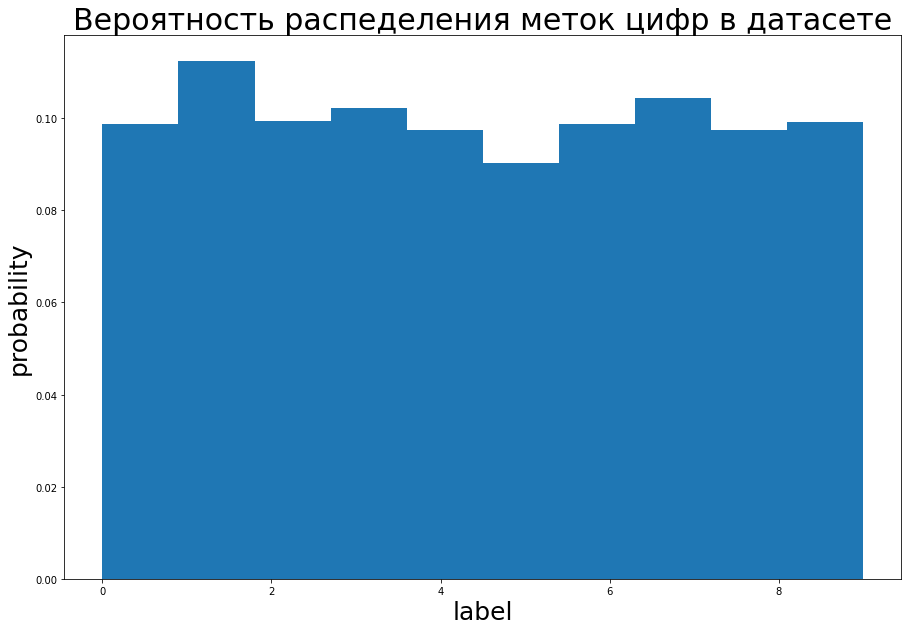

In [46]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 10))
plt.title('Вероятность распеделения меток цифр в датасете', fontsize=30)
plt.xlabel('label', fontsize=25)
plt.ylabel('probability', fontsize=25)
weights = np.ones_like(probality.Y) / len(probality.Y)
plt.hist(probality.Y, weights=weights)
plt.show()

In [82]:
i = 14
j = 14
condition1 = (input_x[:, 0, i, j] > 0.5) * 1.
condition2 = (input_x[:, 0, i, j + 1] > 0.5) * 1.
condition3 = (input_x[:, 0, i + 1, j] > 0.5) * 1.
condition4 = (input_x[:, 0, i + 1, j + 1] > 0.5) * 1.
prob_mult = (condition1.sum() / len(input_x)) * \
            (condition2.sum() / len(input_x)) * \
            (condition3.sum() / len(input_x)) * \
            (condition4.sum() / len(input_x))
prob_joint = (condition1 * condition2 * condition3 * condition4).sum() / len(input_x)
print("совместная вероятность события:            ", prob_joint)
print("перемножения вероятностей каждого события: ", prob_mult)

совместная вероятность события:             0.3325166666666667
перемножения вероятностей каждого события:  0.08890247455508297


(array([0.86928332, 0.01416667, 0.01135   , 0.00878333, 0.00926667,
        0.01055   , 0.00853333, 0.00843333, 0.00983333, 0.0498    ]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

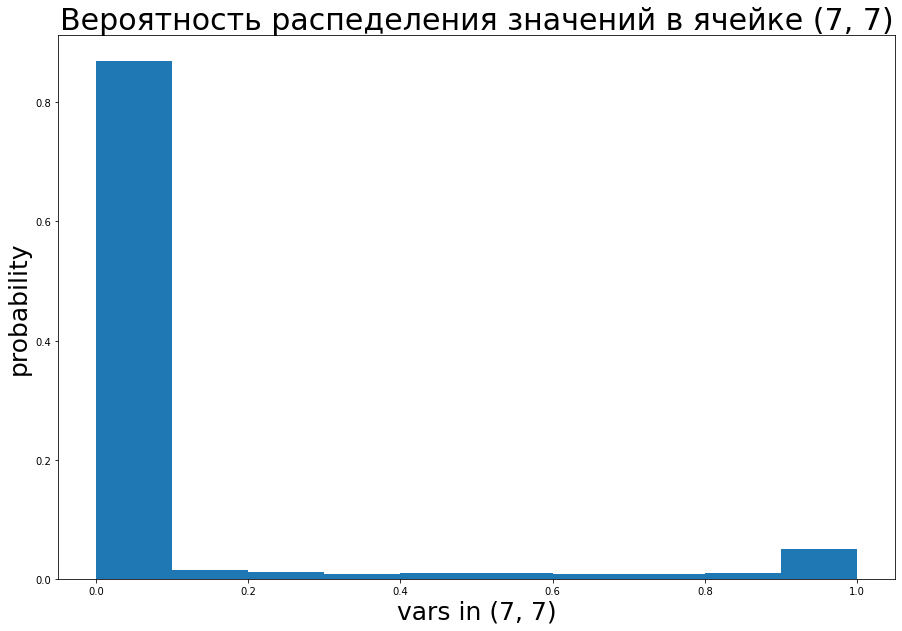

In [57]:
plt.figure(figsize=(15, 10))
plt.title('Вероятность распеделения значений в ячейке (7, 7)', fontsize=30)
arr = probality.X[:, 0, 7, 7]
weights = np.ones_like(arr) / len(arr)
plt.xlabel('vars in (7, 7)', fontsize=25)
plt.ylabel('probability', fontsize=25)
plt.hist(arr, weights=weights)


(array([1.92183331e-01, 1.19633332e-01, 2.69983351e-01, 1.29516661e-01,
        1.17250003e-01, 1.10633336e-01, 4.59499992e-02, 1.23833334e-02,
        2.30000005e-03, 1.66666665e-04]),
 array([0.        , 0.05415841, 0.10831682, 0.16247523, 0.21663363,
        0.27079204, 0.32495046, 0.37910885, 0.43326727, 0.48742566,
        0.5415841 ], dtype=float32),
 <BarContainer object of 10 artists>)

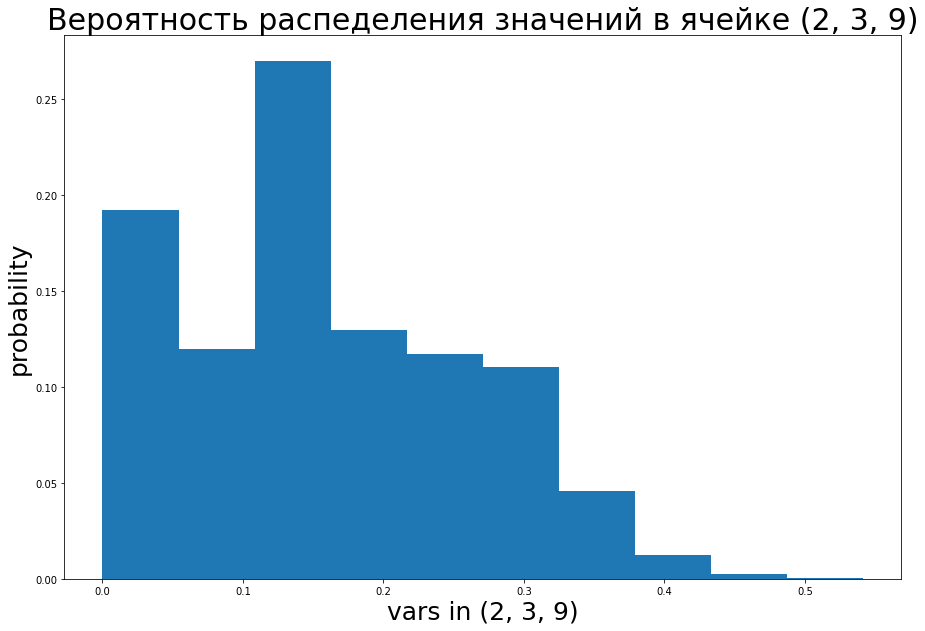

In [83]:
plt.figure(figsize=(15, 10))
plt.title('Вероятность распеделения значений в ячейке (2, 3, 9)', fontsize=30)
arr = probality.Z1[:, 2, 3, 9]
weights = np.ones_like(arr) / len(arr)
plt.xlabel('vars in (2, 3, 9)', fontsize=25)
plt.ylabel('probability', fontsize=25)
plt.hist(arr, weights=weights)
